In [0]:
from textblob import TextBlob
import re
import random, time, tweepy
import seaborn as sns
sns.set(style="whitegrid")

In [119]:
text = "sample_data/hamlet.txt"
print("Hamlet Character List: HAMLET, CLAUDIUS, GHOST, GERTRUDE, KING, QUEEN, \nPOLONIUS, LAERTES, OPHELIA, HORATIO, FORTINBRAS, VOLTEMAND, CORNELIUS, \nROSENCRANTZ, GUILDENSTERN, MARCELLUS, BARNARDO, FRANCISCO, OSRIC, REYNALDO")
play_character = input("Choose a Hamlet Character: ")

Hamlet Character List: HAMLET, CLAUDIUS, GHOST, GERTRUDE, KING, QUEEN, 
POLONIUS, LAERTES, OPHELIA, HORATIO, FORTINBRAS, VOLTEMAND, CORNELIUS, 
ROSENCRANTZ, GUILDENSTERN, MARCELLUS, BARNARDO, FRANCISCO, OSRIC, REYNALDO
Choose a Hamlet Character: Ophelia


In [120]:
text = open(text).read() #entire text
lines = text.split('\n\n') #split text by separate speech
c_lines = "" #specific character lines

#sentiment/speech analysis
c_polarity = [] 
c_subjectivity = []
count=0 #number of times the character speaks
min_speech = None
max_speech = None

for i in lines: #going through each speech
  if i.find(play_character.upper()+".")==0:
    if min_speech is None:
      min_speech = i
      max_speech = i
    elif len(i)<len(min_speech):
      min_speech = i
    elif len(i)>len(max_speech):
      max_speech = i
    c_polarity.append(TextBlob(i[7:]).sentiment.polarity)
    c_subjectivity.append(TextBlob(i[7:]).sentiment.subjectivity)
    c_lines+=i[7:]
    count+=1
words = text.split()

#distant reading analysis
print("Within the play, " + play_character + " speaks " + str(count) + " times.")
print("In total, " + play_character + " speaks "+ str(len(c_lines.split()))+" words.")
print("On average, " + play_character + " will speak for "+ str(len(c_lines.split())//count) + " words without stopping.")
print("")
print( play_character + "'s shortest speech is "+str(len(min_speech.split())-1)+" words long")
print(min_speech)
print("")
print(play_character + "'s longest speech is "+str(len(max_speech.split())-1)+" words long")
print(max_speech)

Within the play, Ophelia speaks 58 times.
In total, Ophelia speaks 1088 words.
On average, Ophelia will speak for 18 words without stopping.

Ophelia's shortest speech is 2 words long
OPHELIA. My lord?

Ophelia's longest speech is 124 words long
OPHELIA. He took me by the wrist and held me hard; Then goes he to the
length of all his arm; And with his other hand thus o’er his brow, He
falls to such perusal of my face As he would draw it. Long stay’d he
so, At last,—a little shaking of mine arm, And thrice his head thus
waving up and down, He rais’d a sigh so piteous and profound As it did
seem to shatter all his bulk And end his being. That done, he lets me
go, And with his head over his shoulder turn’d He seem’d to find his
way without his eyes, For out o’ doors he went without their help, And
to the last bended their light on me.


The average polarity of Ophelia's speech is 0.11352263446885781
The median polarity of Ophelia's speech is 0.0


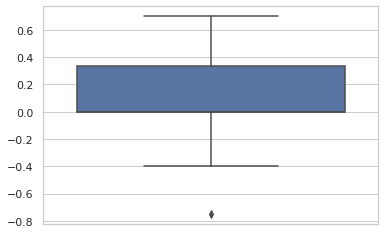

In [121]:
c_polarity.sort()
print("The average polarity of "+play_character+"'s speech is " + str(sum(c_polarity)/len(c_polarity)))
print("The median polarity of "+play_character+"'s speech is " + str(c_polarity[len(c_polarity)//2]))
sns.boxplot(y=c_polarity)

The average subjectivity of Ophelia's speech is 0.3079938380205211
The median subjectivity of Ophelia's speech is 0.3666666666666667


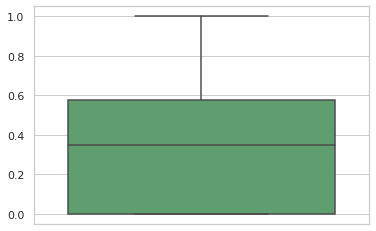

In [122]:
c_subjectivity.sort()
print("The average subjectivity of "+play_character+"'s speech is " + str(sum(c_subjectivity)/len(c_subjectivity)))
print("The median subjectivity of "+play_character+"'s speech is " + str(c_subjectivity[len(c_subjectivity)//2]))
sns.boxplot(y=c_subjectivity, palette=["g"])

In [131]:
start_words =  re.findall('([A-Z][a-z]{0,})', c_lines)
print("There are "+str(len(set(start_words)))+" different start words.")
common_start_words = set([x for x in start_words if start_words.count(x) > 1])
print(str(len(common_start_words))+" start words occur more than once.")
list(common_start_words)[:10]

There are 83 different start words.
35 start words occur more than once.


['Sings', 'Do', 'Tis', 'Good', 'You', 'O', 'Ay', 'How', 'The', 'No']

In [0]:
def ngrams_for_sequence(n, seq):
    return [tuple(seq[i:i+n]) for i in range(len(seq)-n+1)]

In [125]:
hamlet_word_5grams = ngrams_for_sequence(5, open("sample_data/hamlet.txt").read().split())
hamlet_word_5grams[:10]

[('SCENE', 'I.', 'Elsinore.', 'A', 'platform'),
 ('I.', 'Elsinore.', 'A', 'platform', 'before'),
 ('Elsinore.', 'A', 'platform', 'before', 'the'),
 ('A', 'platform', 'before', 'the', 'Castle.'),
 ('platform', 'before', 'the', 'Castle.', 'Enter'),
 ('before', 'the', 'Castle.', 'Enter', 'Francisco'),
 ('the', 'Castle.', 'Enter', 'Francisco', 'and'),
 ('Castle.', 'Enter', 'Francisco', 'and', 'Barnardo,'),
 ('Enter', 'Francisco', 'and', 'Barnardo,', 'two'),
 ('Francisco', 'and', 'Barnardo,', 'two', 'sentinels.')]

In [0]:
def add_to_model(model, n, seq):
    # make a copy of seq and append None to the end
    seq = list(seq[:]) + [None]
    for i in range(len(seq)-n):
        # tuple because we're using it as a dict key!
        gram = tuple(seq[i:i+n])
        next_item = seq[i+n]            
        if gram not in model:
            model[gram] = []
        model[gram].append(next_item)

def markov_model(n, seq):
    model = {}
    add_to_model(model, n, seq)
    return model

In [0]:
c_markov_model = markov_model(2, c_lines.split())

In [0]:
import random
def gen_from_model(n, model, start=None, max_gen=100):
    if start is None:
        start = random.choice(list([i for i in model.keys() if i[0] in common_start_words])) #choose a common start phrases
    output = list(start)
    for i in range(max_gen):
        start = tuple(output[-n:])
        next_item = random.choice(model[start])
        if next_item is None:
            break
        else:
            output.append(next_item)
    return output

In [0]:
def imitate_character():
  generated_words = gen_from_model(2, c_markov_model, None, 18) #bigram approach, with a total of 18 words max
  strange = ' '.join(generated_words)
  #find the last punctuation in the text
  period = strange.rfind('.')
  exclamation = strange.rfind('!')
  question = strange.rfind('?')
  end = max(period, max(exclamation,question))
  return strange[:end+1] #return all the complete sentences

In [132]:
CONSUMER_KEY = 'PLACE YOUR OWN CONSUMER KEY HERE'
CONSUMER_SECRET = 'PLACE YOUR OWN CONSUMER SECRET HERE'
ACCESS_KEY = 'PLACE YOUR OWN ACCESS KEY HERE'
ACCESS_SECRET = 'PLACE YOUR OWN ACCESS SECRET HERE'
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)
i = 1
possible_tweets=[]
while i<=5: #give the user 5 options to tweet out
  postthis = imitate_character()
  if len(postthis)>0 and len(postthis) <= 140:
    print(str(i)+": "+postthis)
    print(TextBlob(postthis).sentiment)
    print("")
    possible_tweets.append(postthis)
    i+=1
print("Type 6 to cancel")
print("")
choice = int(input("Choose one of these to post(#): ") )
if choice>0 and choice<6: #tweet if they choose a valid number
  api.update_status(status=possible_tweets[choice-1])

1: The glass of fashion and the mould of form, Th’observ’d of all observers, quite, quite down!
Sentiment(polarity=-0.19444444444444448, subjectivity=0.2888888888888889)

2: Good my lord, How does your honour for this many a day?. My lord, I have been so affrighted..
Sentiment(polarity=0.6, subjectivity=0.55)

3: By Gis and by Saint Charity, Alack, and fie for shame!
Sentiment(polarity=0.0, subjectivity=0.0)

4: What means this, my lord?. You are keen, my lord, With almost all the holy vows of heaven..
Sentiment(polarity=0.0, subjectivity=0.0)

5: My brother shall know of it. And so I thank you for your good counsel. Come, my coach!
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)

Type 6 to cancel



KeyboardInterrupt: ignored